# Neighborhood Algorithm in Python

References:

    Sambridge, M. (1999). Geophysical inversion with a neighbourhood
    algorithm - I. Searching a parameter space. Geophysical Journal
    International, 138(2), 479–494.

In [1]:
from pyNA import Sampler
import pandas as pd
import numpy as np

## Test 1: Custom Objective function

In [2]:
def objective_function(inputs):
    return np.abs((inputs[:, 0] - 0.2)**2 + (inputs[:, 1] - 0.4)**2)

In [3]:
sampler = Sampler(objective_function=objective_function, 
                  n_initial=100,
                  n_samples=50,
                  n_resample=5,
                  n_iterations=20)

In [4]:
sampler.generate_ensemble()

iter 0, 100 models
iter 1, 150 models
iter 2, 200 models
iter 3, 250 models
iter 4, 300 models
iter 5, 350 models
iter 6, 400 models
iter 7, 450 models
iter 8, 500 models
iter 9, 550 models
iter 10, 600 models
iter 11, 650 models
iter 12, 700 models
iter 13, 750 models
iter 14, 800 models
iter 15, 850 models
iter 16, 900 models
iter 17, 950 models
iter 18, 1000 models
iter 19, 1050 models


In [5]:
results = pd.DataFrame(sampler.dim_models, columns=["param1", "param2"])
results["misfit"] = sampler.misfits

In [6]:
results.head()

,param1,param2,misfit
0,0.516964,0.222267,0.132055
1,0.765059,0.585012,0.353521
2,0.020177,0.951482,0.336468
3,0.083396,0.689641,0.097489
4,0.520985,0.124351,0.179014


In [7]:
results.loc[results.misfit.argmin()]

param1    1.996256e-01
param2    3.998742e-01
misfit    1.559851e-07
Name: 580, dtype: float64

(0.0, 1.0)

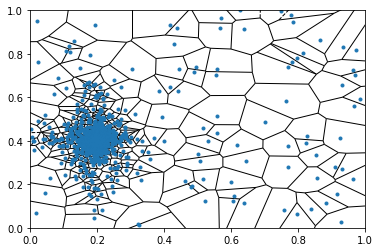

In [8]:
import matplotlib.pyplot as plt
from scipy.spatial import Voronoi, voronoi_plot_2d
vors = Voronoi(results[["param1", "param2"]])
fig = voronoi_plot_2d(vors, show_vertices=False)
plt.xlim(sampler.lower_bounds[0], sampler.upper_bounds[0])
plt.ylim(sampler.lower_bounds[1], sampler.upper_bounds[1])

<AxesSubplot:>

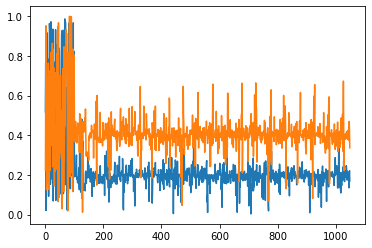

In [9]:
results.param1.plot()
results.param2.plot()

<AxesSubplot:>

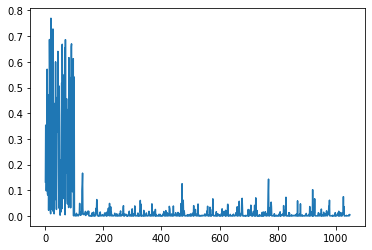

In [10]:
results.misfit.plot()

## Test2:  Rosenbrock Function

In [11]:
def rosenbrock(inputs, a=1, b=100):
    return (a - inputs[:, 0])**2 + b*(inputs[:, 1] - inputs[:, 0]**2)**2

In [12]:
sampler = Sampler(objective_function=rosenbrock,
                  lower_bounds=(-3, -3),
                  upper_bounds=(3.0, 3.0),
                  n_initial=100,
                  n_samples=70,
                  n_resample=10,
                  n_iterations=20)

In [13]:
sampler.generate_ensemble()

iter 0, 100 models
iter 1, 170 models
iter 2, 240 models
iter 3, 310 models
iter 4, 380 models
iter 5, 450 models
iter 6, 520 models
iter 7, 590 models
iter 8, 660 models
iter 9, 730 models
iter 10, 800 models
iter 11, 870 models
iter 12, 940 models
iter 13, 1010 models
iter 14, 1080 models
iter 15, 1150 models
iter 16, 1220 models
iter 17, 1290 models
iter 18, 1360 models
iter 19, 1430 models


In [14]:
results = pd.DataFrame(sampler.dim_models, columns=["param1", "param2"])
results["misfit"] = sampler.misfits

In [15]:
results.head()

,param1,param2,misfit
0,0.801891,0.151142,24.234597
1,-1.362350,1.645920,9.993880
2,0.106610,0.380000,14.387277
3,-2.765706,-1.211642,7865.505758
4,-2.465351,1.205684,2385.909997


In [16]:
results.loc[results.misfit.argmin()]

param1    0.993437
param2    0.986957
misfit    0.000043
Name: 1150, dtype: float64

(-3.0, 3.0)

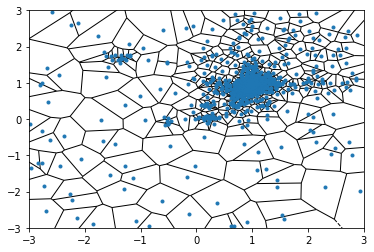

In [17]:
import matplotlib.pyplot as plt
from scipy.spatial import Voronoi, voronoi_plot_2d
vors = Voronoi(results[["param1", "param2"]])
fig = voronoi_plot_2d(vors, show_vertices=False)
plt.xlim(sampler.lower_bounds[0], sampler.upper_bounds[0])
plt.ylim(sampler.lower_bounds[1], sampler.upper_bounds[1])

<AxesSubplot:>

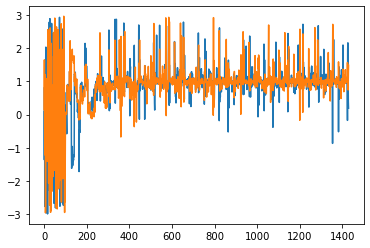

In [18]:
results.param1.plot()
results.param2.plot()

<AxesSubplot:>

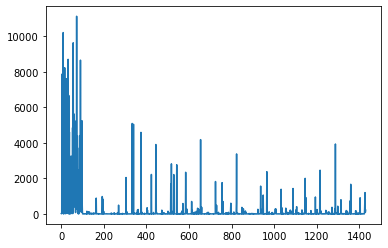

In [19]:
results.misfit.plot()